In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [4]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


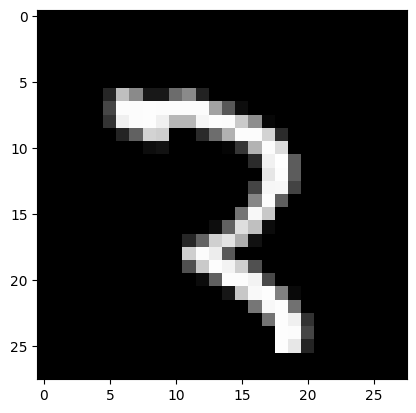

In [6]:
plt.imshow(x_train[500],'gray')

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)
x_train_vec=x_train.reshape(60000,-1)/255.0
x_test_vec=x_test.reshape(10000,-1)/255.0


In [9]:
print(x_train_vec.max())
print(x_train_vec.min())

1.0
0.0


In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
model=Sequential()
model.add(Input(shape=(x_train_vec.shape[1],)))
model.add(Dense(x_train_vec.shape[1],activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from keras.callbacks import EarlyStopping

In [14]:
es=EarlyStopping(min_delta=0.001,patience=1,verbose=True)
res=model.fit(x_train_vec,y_train_oh,epochs=10,validation_data=(x_test_vec,y_test_oh),callbacks=[es])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9088 - loss: 0.3025 - val_accuracy: 0.9658 - val_loss: 0.1030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9755 - loss: 0.0785 - val_accuracy: 0.9755 - val_loss: 0.0829
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0496 - val_accuracy: 0.9794 - val_loss: 0.0654
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9886 - loss: 0.0355 - val_accuracy: 0.9782 - val_loss: 0.0735
Epoch 4: early stopping


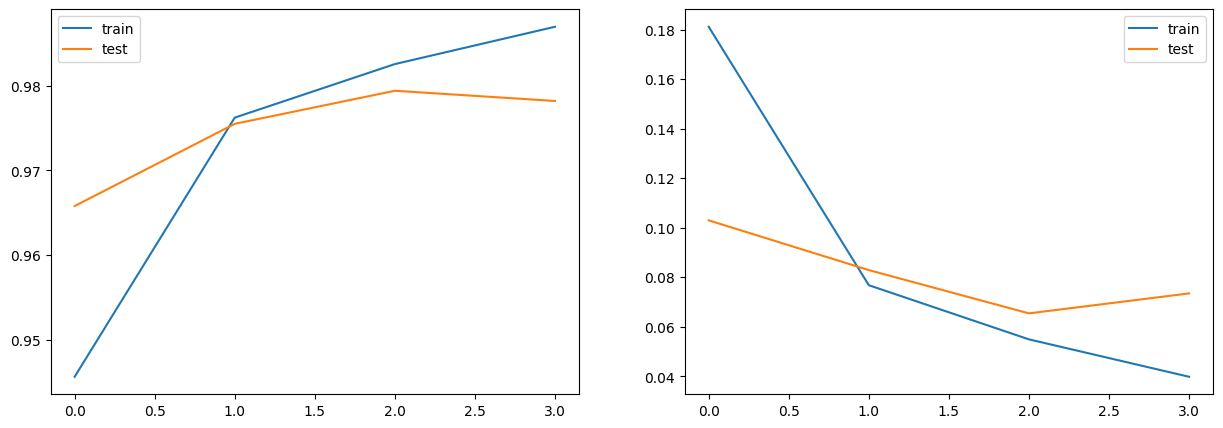

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])


plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test'])

In [ ]:
model.save('mnist_model.h5')